# **Tail Analysis**
This notebook contains code for analyzing the tails of NGC 4039 and NGC 4676A.

## Mice Galaxy (NGC 4676A)

In [ ]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Read pure pixel data
df_mice = pd.read_csv('mice_g.csv', sep=',', header=None)

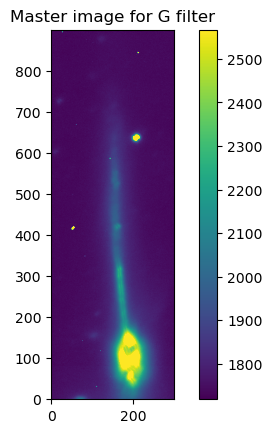

In [ ]:
# Show figure without outliers.
master_img_g = df_mice.values[2900:3800,3100:3400]
img = plt.imshow(master_img_g, origin='lower', vmin=np.percentile(master_img_g, 1), vmax=np.percentile(master_img_g, 99))
plt.title('Master image for G filter')
plt.colorbar(img)
plt.show()

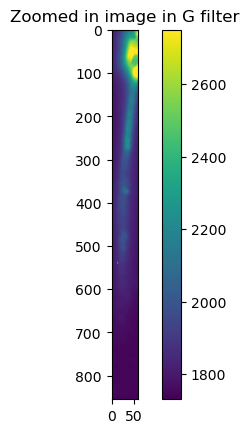

In [ ]:
# Crop image to relevant region.
master_img_g_new = master_img_g[45:, 130:190]
img = plt.imshow(master_img_g_new, vmin=np.percentile(master_img_g_new, 1), vmax=np.percentile(master_img_g_new, 99))
plt.title('Zoomed in image in G filter')
plt.colorbar(img)
plt.show()

Text(0, 0.5, 'Counts')

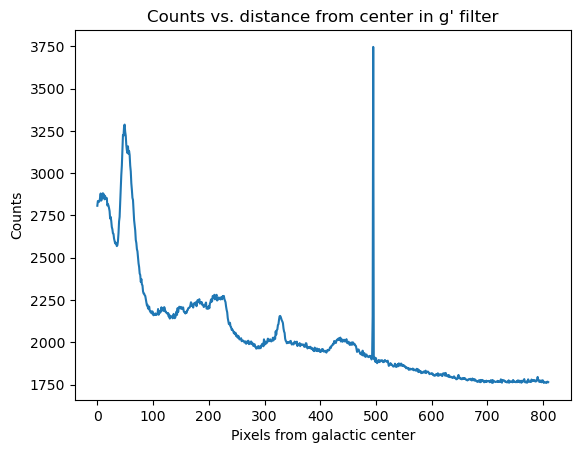

In [ ]:
# Trace the max counts and produce final plot along the tail.
max_counts_idx = []
max_counts = []
for row in master_img_g_new:
    max_counts_idx.append((190-130) - np.argmax(row))
    max_counts.append(max(row))
plt.plot(max_counts[45:])
plt.title("Counts vs. distance from center in g' filter")
plt.xlabel("Pixels from galactic center")
plt.ylabel("Counts")

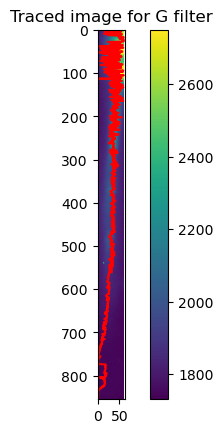

In [156]:
img = plt.imshow(master_img_g_new, vmin=np.percentile(master_img_g_new, 1), vmax=np.percentile(master_img_g_new, 99))
plt.title('Traced image for G filter')
plt.colorbar(img)
plt.plot(np.transpose(max_counts_idx)[::-1], range(0, len(max_counts_idx)), 'r-',)
plt.show()

## Antennae Galaxy (NGC 4039)

In [ ]:
# Read pure pixel data
df_antennae = pd.read_csv('antennae_g.csv', sep=',', header=None)

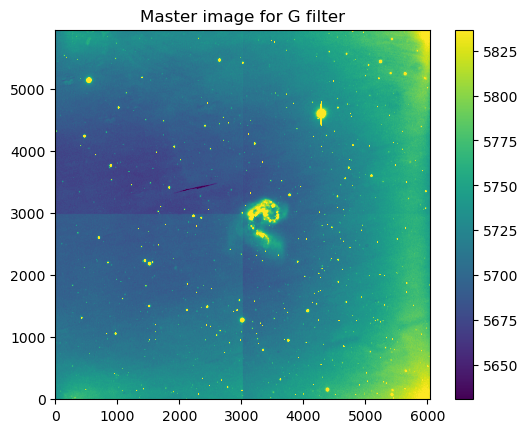

In [157]:
# Show figure without outliers.
master_img_g = df_antennae.values
img = plt.imshow(master_img_g, origin='lower', vmin=np.percentile(master_img_g, 1), vmax=np.percentile(master_img_g, 99))
plt.title('Master image for G filter')
plt.colorbar(img)
plt.show()

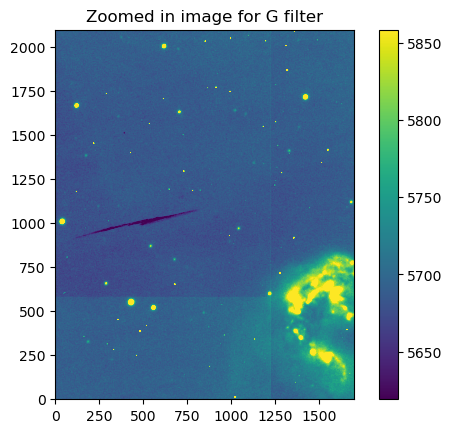

In [160]:
# Crop image to relevant regions.
master_img_g = df_antennae.values[2400:4500, 1800:3500]
img = plt.imshow(master_img_g, origin='lower', vmin=np.percentile(master_img_g, 1), vmax=np.percentile(master_img_g, 99))
plt.title('Zoomed in image for G filter')
plt.colorbar(img)
plt.show()

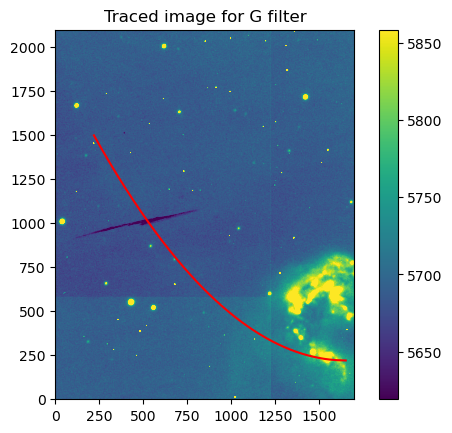

In [250]:
# Curve to trace along in the above image.
def f(x):
    """Tracing function."""
    if -1600 * ((1820 - x) - 1600) >= 0:
        return 1650 - np.sqrt(-1600 * ((1820 - x) - 1600))
    else:
        return -1

# Trace pixel values along curve and plot.
points = [[x, f(x)] for x in range(0, 1500) if f(x) != -1]
x_data = [pt[0] for pt in points]
y_data = [pt[1] for pt in points]
master_img_g = df_antennae.values[2400:4500, 1800:3500]
img = plt.imshow(master_img_g, origin='lower', vmin=np.percentile(master_img_g, 1), vmax=np.percentile(master_img_g, 99))
plt.title('Traced image for G filter')
plt.colorbar(img)
plt.plot(y_data, x_data, 'r-',)
plt.show()

Text(0, 0.5, 'Counts')

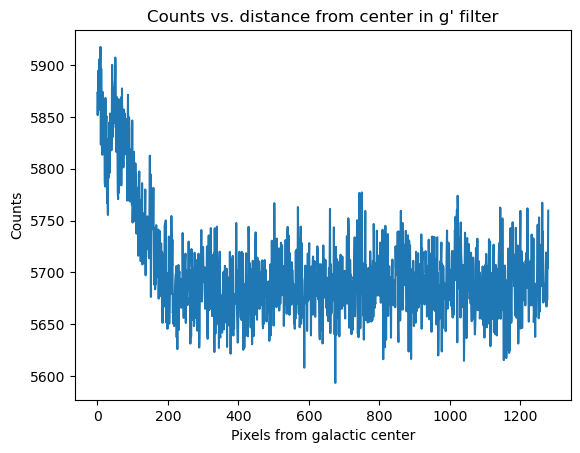

In [253]:
# Produce the final counts plot along the tail.
counts_antennae = []

for point in points:
    counts_antennae.append(master_img_g[2100 - point[0]][1700 - int(point[1])])

plt.plot(counts_antennae[::-1])
plt.title("Counts vs. distance from center in g' filter")
plt.xlabel("Pixels from galactic center")
plt.ylabel("Counts")